In [1]:
import pandas as pd
import torch
from kan import *


In [9]:
df = pd.read_csv("fixed_dataset.csv")
df

,polymer,T,[η],k,a,M,RE
0,PVA-co-VAc,25.0,43.74,0.04910,0.6319,46620,0.2580
1,PVA-co-VAc,30.0,55.43,0.05120,0.6500,46627,0.2731
2,PVA-co-VAc,35.0,61.34,0.05210,0.6581,46409,0.1957
3,PVA-co-VAc,40.0,66.43,0.05234,0.6649,46550,0.1075
4,PVA-co-VAc,45.0,73.88,0.05253,0.6744,46586,0.1849
5,PVA-co-VAc,50.0,79.21,0.05260,0.6809,46523,0.0494
6,PVA-co-VAc,55.0,94.27,0.05280,0.6966,46587,0.1871
7,PVA-co-VAc,60.0,99.79,0.05310,0.7014,46560,0.1290
8,Pectin,22.2,502.12,0.02420,0.8232,176510,2.6221
9,Pectin,26.6,462.35,0.02340,0.8221,168749,1.8901


In [10]:
X = torch.tensor(df[["k", "a", "M"]].values)
y = torch.tensor(df["[η]"].values)

cpu
checkpoint directory created: ./model
saving model version 0.0


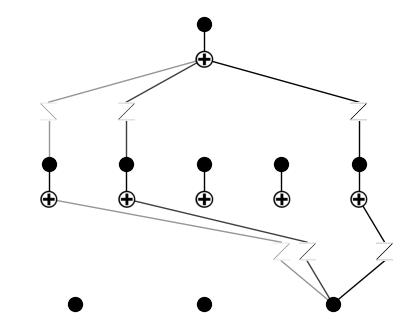

In [13]:
torch.set_default_dtype(torch.float64)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

# create a KAN: 2D inputs, 1D output, and 5 hidden neurons. cubic spline (k=3), 5 grid intervals (grid=5).
model = KAN(width=[3,5,1], grid=3, k=2, seed=42, device=device)
model(X)
model.plot()

In [14]:
from sklearn.model_selection import train_test_split

def generate_kan_dataset(X, y):
    """
    Generate dataset for kan.

    Args:
        X(nparray): tensor of train_input.
        y(nparray): tensor of train_label.
    Returns:
        dict: A dictionary containing train_input, train_label, test_input, test_label
    """

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    dataset = {'train_input': [], 'test_input': [], 'train_label': [], 'test_label': []}

    # Convert lists to tensors
    dataset['train_input'] = torch.tensor(X_train)
    dataset['test_input'] = torch.tensor(X_test)
    dataset['train_label'] = torch.tensor(y_train).reshape(-1, 1)
    dataset['test_label'] = torch.tensor(y_test).reshape(-1, 1)

    return dataset

In [15]:
dataset = generate_kan_dataset(X, y)

/var/folders/ns/t11p9ts50f7481s5zt34wzzr0000gn/T/ipykernel_12856/584215959.py:19: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  dataset['train_input'] = torch.tensor(X_train)
/var/folders/ns/t11p9ts50f7481s5zt34wzzr0000gn/T/ipykernel_12856/584215959.py:20: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  dataset['test_input'] = torch.tensor(X_test)
/var/folders/ns/t11p9ts50f7481s5zt34wzzr0000gn/T/ipykernel_12856/584215959.py:21: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  dataset['train_label'] = torch.tensor(y_train).reshape(-1, 1)
/var/f

In [16]:
dataset

{'train_input': tensor([[2.1700e-02, 8.1800e-01, 1.6901e+05],
         [2.1300e-02, 8.1290e-01, 1.7379e+05],
         [2.2200e-02, 8.2130e-01, 1.7133e+05],
         [2.7911e+00, 1.2741e+00, 1.6729e+06],
         [5.1200e-02, 6.5000e-01, 4.6627e+04],
         [5.2530e-02, 6.7440e-01, 4.6586e+04],
         [5.2600e-02, 6.8090e-01, 4.6523e+04],
         [5.2100e-02, 6.5810e-01, 4.6409e+04],
         [1.6310e-01, 8.7370e-01, 6.7449e+04],
         [5.2340e-02, 6.6490e-01, 4.6550e+04],
         [1.6600e-01, 8.8500e-01, 6.7442e+04],
         [1.6260e-01, 8.6210e-01, 6.7462e+04],
         [2.8122e+00, 1.2727e+00, 1.6744e+06],
         [1.6140e-01, 8.1980e-01, 6.7425e+04],
         [2.8145e+00, 1.2675e+00, 1.6735e+06],
         [5.3100e-02, 7.0140e-01, 4.6560e+04],
         [2.2600e-02, 8.2150e-01, 1.7312e+05],
         [2.1500e-02, 8.1690e-01, 1.7068e+05],
         [2.8135e+00, 1.2704e+00, 1.6726e+06],
         [5.2800e-02, 6.9660e-01, 4.6587e+04]]),
 'test_input': tensor([[1.6180e-01, 8.4000e

In [17]:
def train_acc():
    return torch.mean((torch.round(model(dataset['train_input'])[:,0]) == dataset['train_label'][:,0]).float())

def test_acc():
    return torch.mean((torch.round(model(dataset['test_input'])[:,0]) == dataset['test_label'][:,0]).float())

In [18]:
# train the model
result = model.fit(dataset, opt="LBFGS", steps=20, metrics=(train_acc, test_acc))

| train_loss: 1.59e+02 | test_loss: 2.09e+02 | reg: 5.36e+01 | : 100%|█| 20/20 [00:02<00:00,  9.28it

saving model version 0.1


In [19]:
result

{'train_loss': [array(212.53798852),
  array(206.59529332),
  array(202.82066161),
  array(201.96236851),
  array(201.81974905),
  array(201.77492044),
  array(201.19058535),
  array(201.15843041),
  array(201.10699502),
  array(201.1000486),
  array(201.03971237),
  array(201.0076114),
  array(200.69977551),
  array(199.62620472),
  array(198.59249313),
  array(183.47261138),
  array(161.67948065),
  array(160.66791568),
  array(160.06306411),
  array(159.47799992)],
 'test_loss': [array(267.11653866),
  array(260.79421514),
  array(256.31227516),
  array(255.13448933),
  array(255.02215001),
  array(254.93757653),
  array(254.29599024),
  array(254.23849633),
  array(254.13843188),
  array(254.12833625),
  array(254.11036474),
  array(254.11528662),
  array(253.6943339),
  array(252.63812841),
  array(251.57253026),
  array(239.83729147),
  array(212.77533334),
  array(211.70596549),
  array(210.03561831),
  array(208.89595251)],
 'reg': [array(0.),
  array(0.),
  array(0.),
  array(

In [20]:
lib = ['x','x^2','x^3','x^4','exp','log','sqrt','tanh','sin','abs']

model.auto_symbolic(lib=lib)

fixing (0,0,0) with sin, r2=0.9997417037028622, c=2
fixing (0,0,1) with sin, r2=0.9995476316266513, c=2
fixing (0,0,2) with x, r2=0.9999748301063757, c=1
fixing (0,0,3) with x, r2=0.9982774846451874, c=1
fixing (0,0,4) with sin, r2=0.999891977495536, c=2
fixing (0,1,0) with log, r2=0.9940547518226648, c=2
fixing (0,1,1) with sin, r2=0.9752338988623933, c=2
fixing (0,1,2) with x^2, r2=0.9999997511186082, c=2
fixing (0,1,3) with x^2, r2=0.9999551471144642, c=2
fixing (0,1,4) with x, r2=0.003692000527361277, c=1
fixing (0,2,0) with x, r2=0.9999999987145193, c=1
fixing (0,2,1) with x, r2=0.9999999999993521, c=1
fixing (0,2,2) with x, r2=1.0000000000000004, c=1
fixing (0,2,3) with x, r2=1.000000000000001, c=1
fixing (0,2,4) with x, r2=0.9999999998957875, c=1
fixing (1,0,0) with x, r2=0.9999999853248362, c=1
fixing (1,1,0) with x, r2=0.9999999995485637, c=1
fixing (1,2,0) with x, r2=0.9373729897398422, c=1
fixing (1,3,0) with x, r2=0.8767607141946541, c=1
fixing (1,4,0) with x, r2=0.99999999

In [21]:
from kan.utils import ex_round

result = ex_round(model.symbolic_formula()[0][0], 4)
result

5.8489*x_2 - 0.0002*x_3 - 1.9514*log(7.6304*x_2 - 4.8215) - 72.4699*sin(3.0686*x_1 + 8.3522) + 53.093*sin(9.982*x_1 - 7.992) + 3.6503*sin(10.0*x_1 - 1.8) + 1.0641*sin(10.0*x_2 + 9.0) + 298.0426